In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data = pd.read_csv("Cleaned_car_data.csv")

In [3]:
data.head()

,Model,Year,Brand,Kms_driven,Fuel_type,Price
0,Tata Nexon XT,2020,Tata,33000,Diesel,970000
1,Maruti Suzuki Swift,2014,Maruti,70840,Diesel,95000
2,Mercedes Benz B,2016,Mercedes,44573,Diesel,1790000
3,Audi Q3 2.0,2014,Audi,88759,Diesel,1790000
4,Honda City ZX,2021,Honda,9900,Petrol,1490000


## Exploratory Data Analysis

Getting insights about the dataset

In [4]:
data.shape

(1547, 6)

 **This dataset has 1547 rows and 6 columns**

In [5]:
#the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       1547 non-null   object
 1   Year        1547 non-null   int64 
 2   Brand       1547 non-null   object
 3   Kms_driven  1547 non-null   int64 
 4   Fuel_type   1547 non-null   object
 5   Price       1547 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 72.6+ KB


In [6]:
#quick summary of the dataset
data.describe()

,Year,Kms_driven,Price
count,1547.000000,1.547000e+03,1.547000e+03
mean,2016.665158,1.543028e+05,6.613786e+06
std,4.132864,2.977240e+06,2.313954e+08
min,1996.000000,0.000000e+00,2.000000e+03
25%,2015.000000,1.638500e+04,3.967995e+05
50%,2017.000000,3.800000e+04,5.250000e+05
75%,2020.000000,6.500000e+04,7.500000e+05
max,2022.000000,9.395149e+07,9.101659e+09


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
#checking for null values
data.isnull().sum()

Model         0
Year          0
Brand         0
Kms_driven    0
Fuel_type     0
Price         0
dtype: int64

**There are no missing value**

In [9]:
#Having an idea of the brands of the car
data.Brand.unique()

array(['Tata', 'Maruti', 'Mercedes', 'Audi', 'Honda', 'Hyundai',
       'Volkswagen', 'Mahindra', 'Land Rover', 'Toyota', 'BMW', 'Ford',
       'Volvo', 'Renault', 'Kia', 'Chevrolet', 'Datsun', 'Skoda', 'Jeep',
       'MG', 'Jaguar', 'Nissan', 'Porsche', 'Force', 'Fiat',
       'Mini Cooper', 'Mitsubishi'], dtype=object)

In [10]:
data.Brand.nunique()

27

**There are total 27 unique brands of car in the dataset**

In [11]:
data.Model.nunique()

303

**Total 303 models are persent in the dataset. 'Model' is a categorical variable. We will check how 'Model' affects our target variable i.e., 'Price' and accordingly we will perform some encoding technique to convert them into numeric form.**

In [12]:
#Checking for maximum distance driven
data.Kms_driven.max()

93951488

This is quite a huge number

In [13]:
data.loc[data['Kms_driven'] == 93951488]

,Model,Year,Brand,Kms_driven,Fuel_type,Price
925,Maruti Suzuki A,2000,Maruti,93951488,CNG,9101658655


The kms driven is not making any sense also the price mentioned appears to be a phone number. This input will act like an outlier, so we will drop this particular row.

In [14]:
data.drop(925,axis=0,inplace=True)

In [15]:
data.describe()

,Year,Kms_driven,Price
count,1546.000,1546.000,1546.000
mean,2016.676,93631.893,730833.678
std,4.112,1780890.975,1866362.640
min,1996.000,0.000,2000.000
25%,2015.000,16382.000,396699.250
50%,2017.000,38000.000,525000.000
75%,2020.000,65000.000,750000.000
max,2022.000,70022082.000,50000000.000


We observe that the max value of Price is 50000000, let us check which car is it. 

In [16]:
data.loc[data['Price']>6000000]

,Model,Year,Brand,Kms_driven,Fuel_type,Price
6,Mercedes Benz E,2017,Mercedes,20000,Diesel,6200000
907,Maruti Suzuki A,2022,Maruti,40,Petrol,50000000
924,Maruti Suzuki A,2022,Maruti,40,Petrol,50000000
1300,Land Rover Range,2021,Land Rover,35000,Diesel,6666666
1440,BMW X5 xDrive30d,2019,BMW,56000,Diesel,7690000


The most expensive Maruti Suzuki car in India one is the XL6 with a price of 14.55 Lakh. So, it doesn't make any sense.Hence, we will drop these two rows.

In [17]:
data.drop([907,924],axis=0,inplace=True)

In [18]:
data.describe()

,Year,Kms_driven,Price
count,1544.000,1544.000,1544.000
mean,2016.669,93753.126,667013.514
std,4.111,1782041.585,580813.870
min,1996.000,0.000,2000.000
25%,2015.000,16396.250,396599.000
50%,2017.000,38000.000,524999.500
75%,2020.000,65000.000,747899.250
max,2022.000,70022082.000,7690000.000


In [19]:
data.loc[data['Kms_driven']==70022082]

,Model,Year,Brand,Kms_driven,Fuel_type,Price
904,Maruti Suzuki Alto,2022,Maruti,70022082,CNG,50000


In [20]:
data.drop(904,axis=0,inplace=True)

In [21]:
data.describe()

,Year,Kms_driven,Price
count,1543.000,1543.000,1543.000
mean,2016.666,48433.405,667413.393
std,4.110,66999.389,580789.524
min,1996.000,0.000,2000.000
25%,2015.000,16394.500,396799.500
50%,2017.000,38000.000,525000.000
75%,2020.000,65000.000,748599.500
max,2022.000,980000.000,7690000.000


**Let us plot histogram to get an idea of the distribution of the continuous variables**

<AxesSubplot: xlabel='Price', ylabel='Count'>

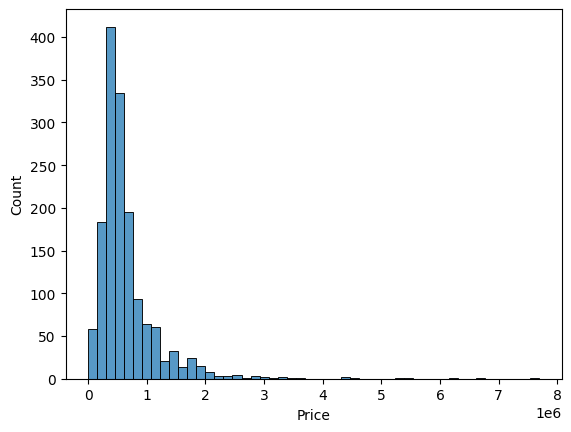

In [22]:
sns.histplot(data['Price'],bins=50)

<AxesSubplot: xlabel='Kms_driven', ylabel='Count'>

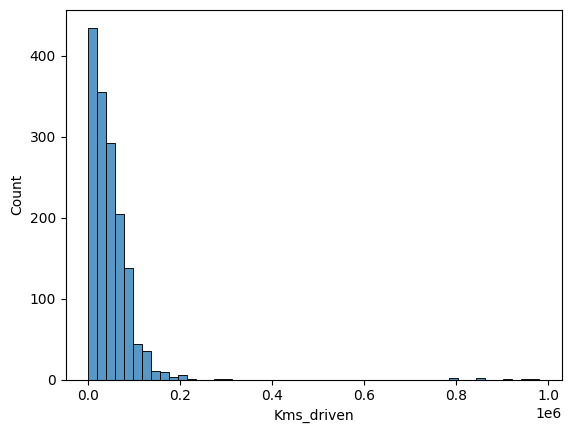

In [23]:
sns.histplot(data['Kms_driven'],bins=50)

We can observe that the data is not normally distributed and is quite skewed to the right. We will apply some transformation to make the data normally distributed.

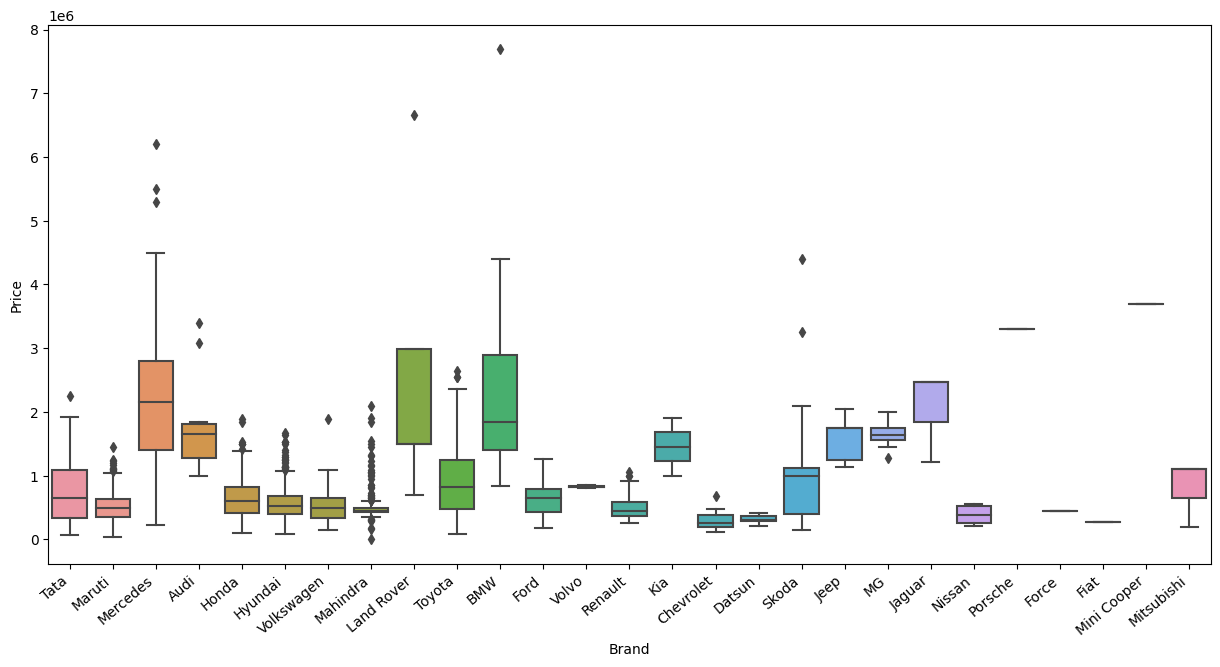

In [24]:
#Checking relationship of Brand with Price
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Brand',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


From the boxplot, we can observe that few brand like Mercedes, BMW, Land Rover have high prices, which makes sense.  

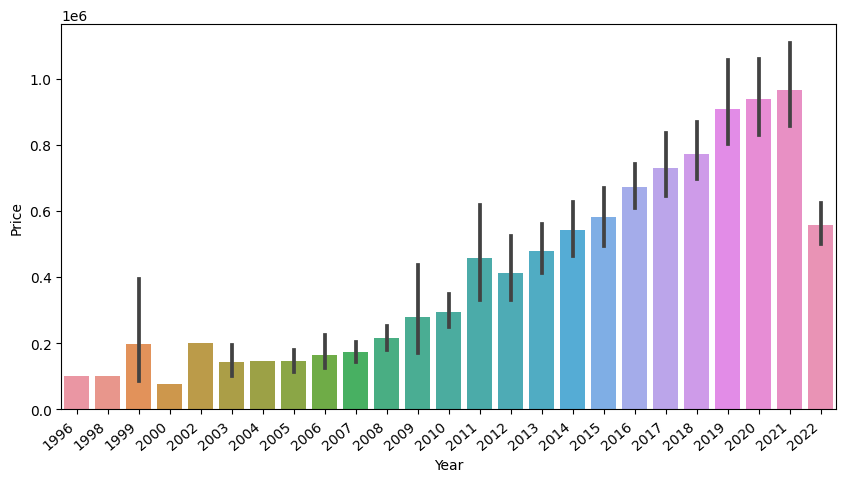

In [25]:
#Checking relationship of Year with Price
plt.subplots(figsize=(10,5))
ax=sns.barplot(x='Year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

The Price increases as the car is purchased more recently. The less it is used, the better is the condition, the more is the price.

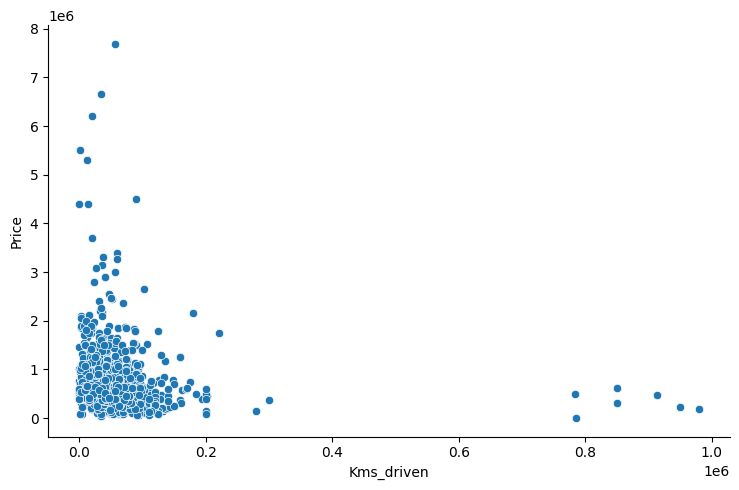

In [26]:
#Checking relationship of kms_driven with Price
sns.relplot(x='Kms_driven',y='Price',data=data,height=5,aspect=1.5)

When we buy second hand cars, we definetly check for how much distance the car is driven. The lesser the distance, the more the price. From the graph as well, we can see the price is higher for less driven cars.

In [27]:
#unique feul types
data.Fuel_type.unique()

array([' Diesel', ' Diesel ', ' Petrol ', ' CNG', ' Petrol', ' CNG ',
       ' Petrol + CNG ', ' LPG', ' Electric ', ' Electric', ' Hybrid',
       ' Hybrid '], dtype=object)

In [28]:
#removing whitespace from the characters of fuel column 
data['Fuel_type']= data['Fuel_type'].str.strip()

In [29]:
data.Fuel_type.unique()

array(['Diesel', 'Petrol', 'CNG', 'Petrol + CNG', 'LPG', 'Electric',
       'Hybrid'], dtype=object)

<AxesSubplot: xlabel='Fuel_type', ylabel='Price'>

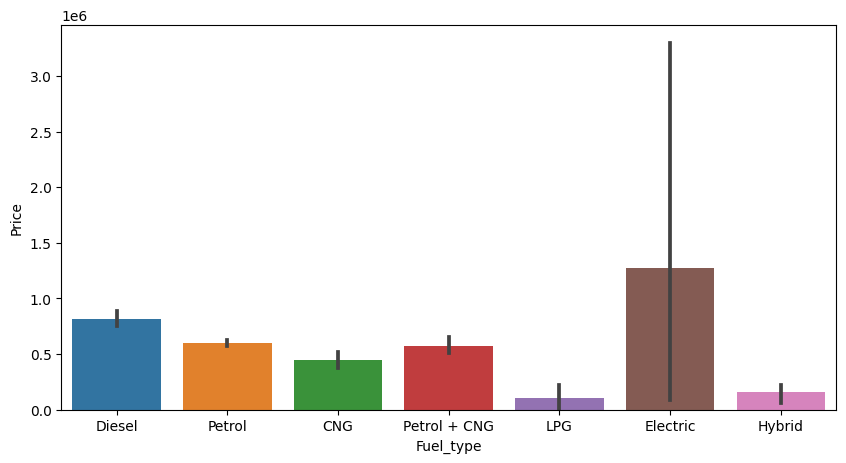

In [30]:
#Checking relationship of Fuel Type with Price
plt.subplots(figsize=(10,5))
sns.barplot(x='Fuel_type',y='Price',data=data)

We observe that electric cars are more costly than other fuel

**Boxplot to check the presence of outliers**

<AxesSubplot: >

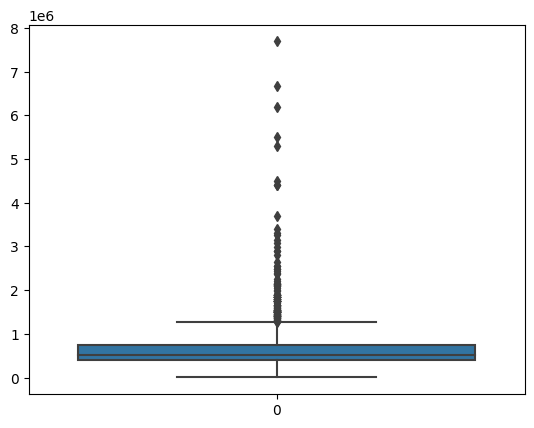

In [31]:
sns.boxplot(data["Price"])

<AxesSubplot: >

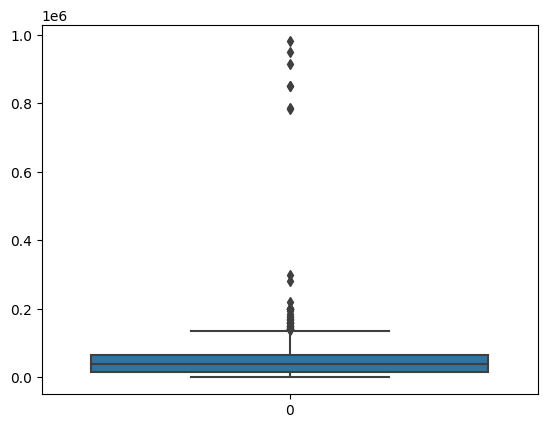

In [32]:
sns.boxplot(data["Kms_driven"])

As we can see there are outliers in the Price and Kms_driven column, so to fix it we will apply Winsorisation technique.

In [33]:
IQR_price = data['Price'].quantile(0.75) - data['Price'].quantile(0.25)
lower_limit_price = data['Price'].quantile(0.25) - (IQR_price * 1.5)
upper_limit_price = data['Price'].quantile(0.75) + (IQR_price * 1.5)

In [34]:
print(lower_limit_price)
print(upper_limit_price)

-130900.5
1276299.5


In [35]:
IQR_kms = data['Kms_driven'].quantile(0.75) - data['Price'].quantile(0.25)
lower_limit_kms = data['Kms_driven'].quantile(0.25) - (IQR_kms * 1.5)
upper_limit_kms = data['Kms_driven'].quantile(0.75) + (IQR_kms * 1.5)

In [36]:
print(lower_limit_kms)
print(upper_limit_kms)

514093.75
-432699.25


((array([-3.3206008 , -3.06450561, -2.92215629, ...,  2.92215629,
          3.06450561,  3.3206008 ]),
  array([   2000,   45000,   45000, ..., 6200000, 6666666, 7690000],
        dtype=int64)),
 (462235.17583768506, 667413.3933895011, 0.7946209945186501))

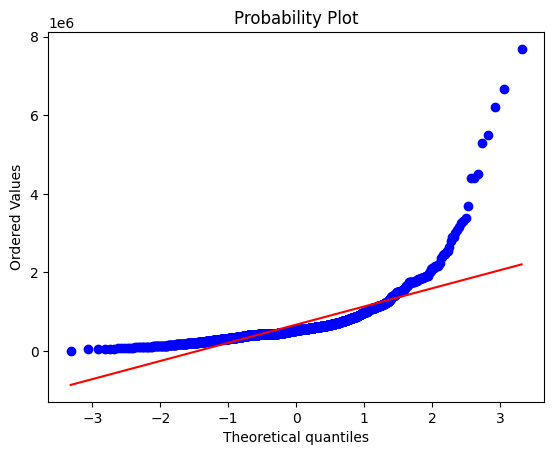

In [37]:
from scipy import stats
import pylab
stats.probplot(data['Price'], dist = "norm", plot = pylab)

In [38]:
from datetime import date
todays_date = date.today()
todays_date.year

2022

In [39]:
data['Years_used']=todays_date.year - data['Year']

In [40]:
data.drop(['Year'],axis=1,inplace=True)

In [41]:
data.head()

,Model,Brand,Kms_driven,Fuel_type,Price,Years_used
0,Tata Nexon XT,Tata,33000,Diesel,970000,2
1,Maruti Suzuki Swift,Maruti,70840,Diesel,95000,8
2,Mercedes Benz B,Mercedes,44573,Diesel,1790000,6
3,Audi Q3 2.0,Audi,88759,Diesel,1790000,8
4,Honda City ZX,Honda,9900,Petrol,1490000,1


C:\Users\excep\AppData\Local\Temp\ipykernel_4008\3385634631.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")


<AxesSubplot: >

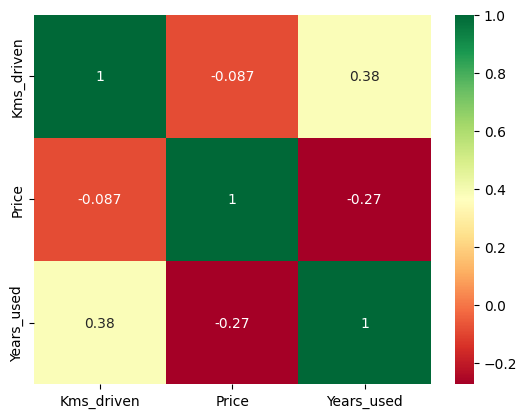

In [42]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

## Feature Engineering

**Dropping Duplicate values**

In [43]:
#checking for duplicate rows
data.duplicated(subset=['Model', 'Years_used', 'Brand', 'Kms_driven', 'Fuel_type']).sum()

204

In [44]:
#droping duplicates
data.drop_duplicates(subset=['Model', 'Years_used', 'Brand', 'Kms_driven', 'Fuel_type'],keep='first', inplace=True, ignore_index=True)

In [45]:
data.loc[data['Kms_driven']==0]

,Model,Brand,Kms_driven,Fuel_type,Price,Years_used
729,Hyundai AURA S,Hyundai,0,Diesel,1000000,2


In [46]:
data.at[729,'Kms_driven']= data.Kms_driven.median()

In [47]:
data.head()

,Model,Brand,Kms_driven,Fuel_type,Price,Years_used
0,Tata Nexon XT,Tata,33000,Diesel,970000,2
1,Maruti Suzuki Swift,Maruti,70840,Diesel,95000,8
2,Mercedes Benz B,Mercedes,44573,Diesel,1790000,6
3,Audi Q3 2.0,Audi,88759,Diesel,1790000,8
4,Honda City ZX,Honda,9900,Petrol,1490000,1


In [48]:
X=data[['Model','Brand','Kms_driven','Fuel_type','Years_used']]
y=data[['Price']]


In [49]:
X.shape

(1339, 5)

In [50]:
y.shape

(1339, 1)

### Applying Transformation to make the data normally distributed

In [51]:
X["Log_Kms_driven"] = np.log(X["Kms_driven"])

((array([-3.28082137, -3.02184584, -2.87771807, ...,  2.87771807,
          3.02184584,  3.28082137]),
  array([ 2.48490665,  2.48490665,  2.48490665, ..., 13.72512294,
         13.76421726, 13.79530785])),
 (1.117140924238399, 10.40406628634705, 0.8626293384193154))

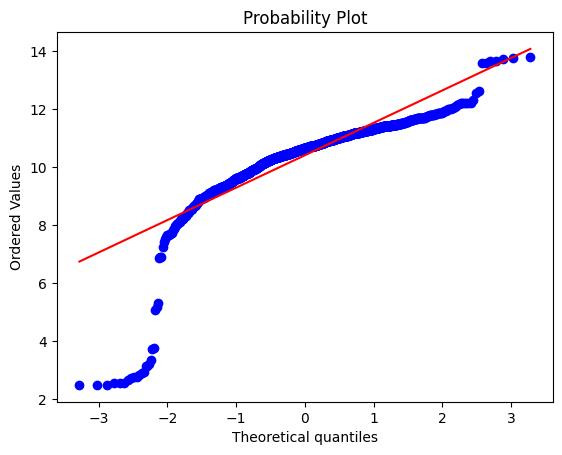

In [52]:
# Checking whether data is normally distributed
import scipy.stats as stats
import pylab
stats.probplot(X['Log_Kms_driven'], dist = "norm", plot = pylab)

In [53]:
X["sqrt_Kms_driven"] = np.sqrt(X["Kms_driven"])

((array([-3.28082137, -3.02184584, -2.87771807, ...,  2.87771807,
          3.02184584,  3.28082137]),
  array([  3.46410162,   3.46410162,   3.46410162, ..., 955.81222005,
         974.67943448, 989.94949366])),
 (90.48403451076325, 208.3337779307709, 0.9302093398973816))

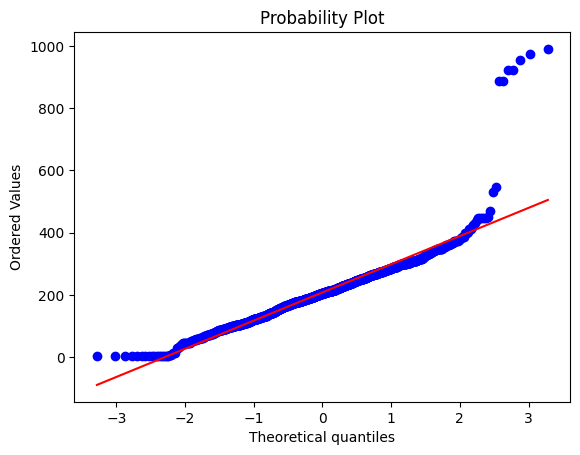

In [54]:
stats.probplot(X['sqrt_Kms_driven'], dist = "norm", plot = pylab)

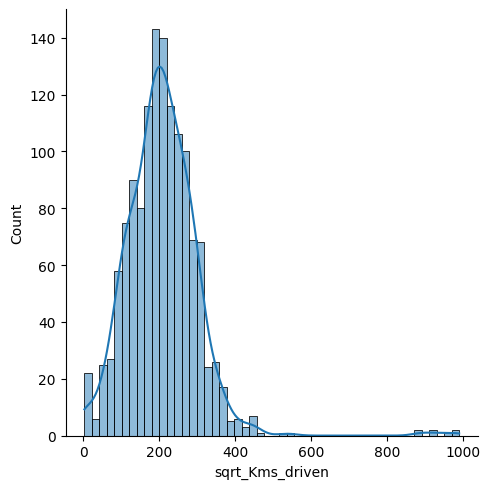

In [55]:
sns.displot(X['sqrt_Kms_driven'],kde=True, bins=50)

In [56]:
y["Log_Price"] = np.log(y["Price"])

C:\Users\excep\AppData\Local\Temp\ipykernel_4008\249330477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Log_Price"] = np.log(y["Price"])


((array([-3.28082137, -3.02184584, -2.87771807, ...,  2.87771807,
          3.02184584,  3.28082137]),
  array([ 7.60090246, 10.71441777, 10.71441777, ..., 15.64005985,
         15.71263044, 15.85543134])),
 (0.6713205122530919, 13.191063765378336, 0.982736020192785))

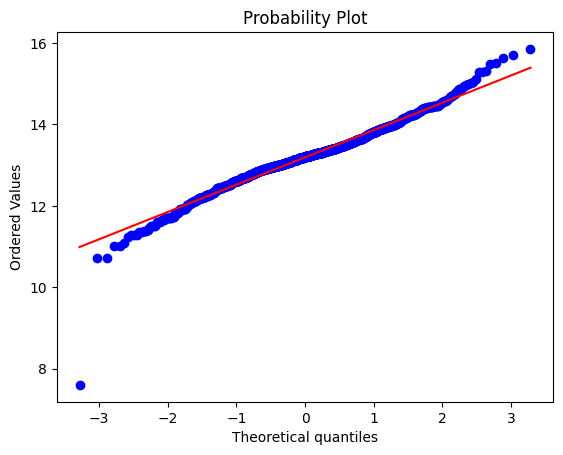

In [57]:
stats.probplot(y['Log_Price'], dist = "norm", plot = pylab)

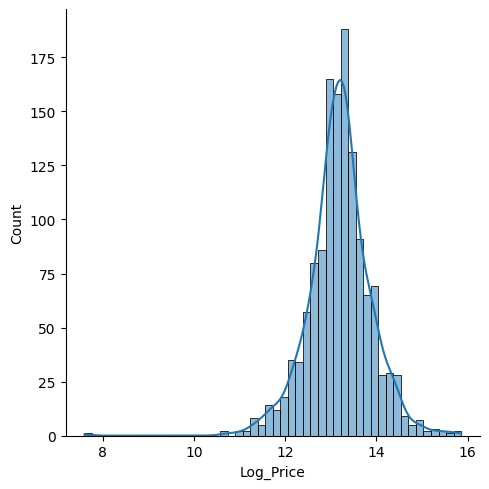

In [58]:
sns.displot(y['Log_Price'],kde=True, bins=50)

In [59]:
y.drop("Price",axis=1,inplace= True)

C:\Users\excep\AppData\Local\Temp\ipykernel_4008\1976966639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop("Price",axis=1,inplace= True)


In [60]:
from feature_engine.outliers import Winsorizer

In [61]:
#Define the model with IQR method
winsor_iqr = Winsorizer(capping_method = 'iqr', 
                        # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'right', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['sqrt_Kms_driven'])

In [62]:
X["Kms_driven_treated"]=winsor_iqr.fit_transform(X[['sqrt_Kms_driven']])

<AxesSubplot: >

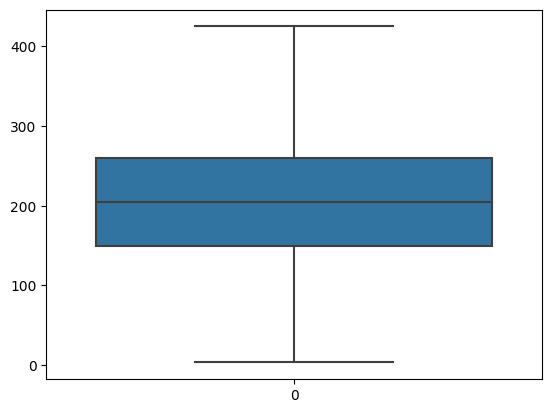

In [63]:
sns.boxplot(X.Kms_driven_treated)

In [64]:
X.head()

,Model,Brand,Kms_driven,Fuel_type,Years_used,Log_Kms_driven,sqrt_Kms_driven,Kms_driven_treated
0,Tata Nexon XT,Tata,33000,Diesel,2,10.404,181.659,181.659
1,Maruti Suzuki Swift,Maruti,70840,Diesel,8,11.168,266.158,266.158
2,Mercedes Benz B,Mercedes,44573,Diesel,6,10.705,211.123,211.123
3,Audi Q3 2.0,Audi,88759,Diesel,8,11.394,297.924,297.924
4,Honda City ZX,Honda,9900,Petrol,1,9.200,99.499,99.499


In [65]:
X.drop(["Log_Kms_driven","sqrt_Kms_driven","Kms_driven"],axis=1, inplace=True)

In [66]:
X.head()

,Model,Brand,Fuel_type,Years_used,Kms_driven_treated
0,Tata Nexon XT,Tata,Diesel,2,181.659
1,Maruti Suzuki Swift,Maruti,Diesel,8,266.158
2,Mercedes Benz B,Mercedes,Diesel,6,211.123
3,Audi Q3 2.0,Audi,Diesel,8,297.924
4,Honda City ZX,Honda,Petrol,1,99.499


In [67]:
y.head()

,Log_Price
0,13.785
1,11.462
2,14.398
3,14.398
4,14.214


## Model Building

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(X[['Model','Brand','Fuel_type']])


OneHotEncoder()

In [70]:
from sklearn.compose import make_column_transformer
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Model','Brand','Fuel_type']),
                                    remainder='passthrough')

In [71]:
from sklearn.pipeline import make_pipeline

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [73]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [74]:
np.argmax(scores)

499

In [75]:
scores[np.argmax(scores)]

0.9153656254638508

In [83]:
np.exp(pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti','Petrol',5,100]).reshape(1,5))))


array([[542776.65320603]])

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A3 35', 'Audi A4 2.0', 'Audi A4 35', 'Audi A6 35',
       'Audi Q3', 'Audi Q3 2.0', 'BMW 3 Series', 'BMW 5 Series',
       'BMW X1 sDrive20d', 'BMW X5 xDrive', 'BMW X5 xDrive30d',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Captiva 2.0',...
       'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'MG',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini Cooper', 'Mitsubishi',
       'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol',
       'Petrol + CNG'], dtype=object)]),
                                            

In [78]:
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9153656254638508

In [79]:
y_pred_train=pipe.predict(X_train)
r2_score(y_train,y_pred_train)

0.9314920296777818

In [84]:
np.exp(pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Audi Q3 2.0','Audi','Diesel',5,266]).reshape(1,5))))

array([[2371867.87657122]])

In [85]:
#import pickle

In [86]:
#pickle.dump(pipe,open('RegressionModel_car.pkl','wb'))